# U.S. Medical Insurance Costs

## Data preparation
First we need to import the libraries.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

Then we create the Dataframe and take a look to it

In [2]:
insurance_records = pd.read_csv('insurance.csv')
print(insurance_records.head())
print(insurance_records.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


## First look
Before the deep analysis, let's see the "charges" global statistics: mean, median and distribution. All of them are represented in the histogram graph.

The average charge is 13270.42 and the median is 9382.03


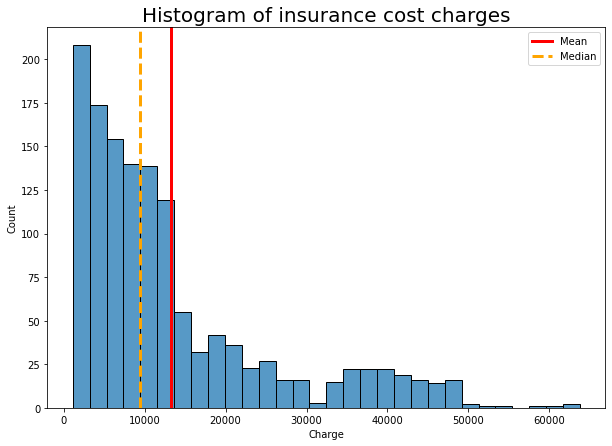

In [3]:
global_average = round(insurance_records['charges'].mean(), 2)
global_median = round(insurance_records['charges'].median(),2)
print(f'The average charge is {global_average} and the median is {global_median}')
plt.figure(figsize=(10,7))
sns.histplot(insurance_records, x='charges')
plt.axvline(global_average, color='r', linestyle='solid', linewidth=3, label='Mean')
plt.axvline(global_median, color='orange', linestyle='dashed', linewidth=3, label='Median')
plt.legend()
plt.title('Histogram of insurance cost charges', size=20)
plt.xlabel('Charge')
plt.show()

The distribution of the charges is multimodal and right-skewed (the mean is higher than the median).

## Individual variable analysis
Once we have the descriptive statistics from the whole dataframe, we are going to inspect every variable.

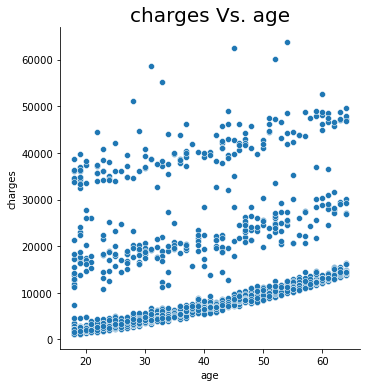

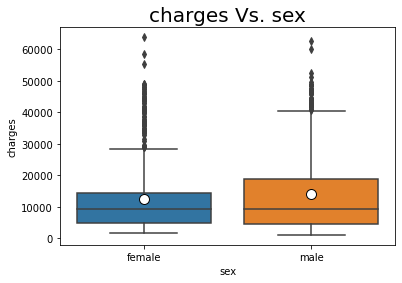

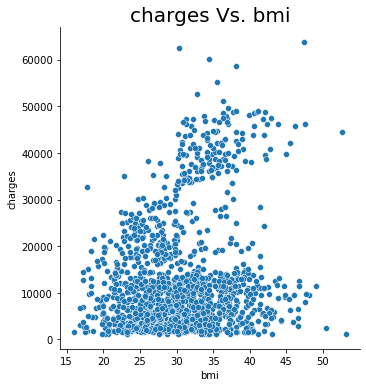

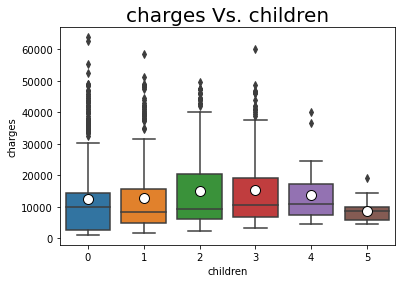

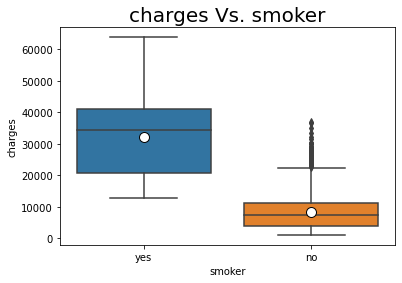

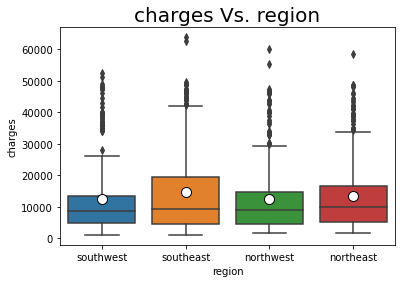

In [4]:
# List of inputs variables:
variable_names = list(insurance_records.columns)
input_variables = variable_names[:-1]
output_variable = variable_names[-1]

# Make a graph for every variable
for variable in input_variables:
    if insurance_records[variable].dtype == object or variable == 'children':
        sns.boxplot(data=insurance_records, x=variable, y=output_variable, showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
        plt.title(f'{output_variable} Vs. {variable}', size=20)
    else:
        sns.relplot(data=insurance_records, x=variable, y=output_variable)
        plt.title(f'{output_variable} Vs. {variable}', size=20)
    plt.show()


For BMI and age there is no clear correlation and maybe other variables affect. There is clear difference between smokers and non-smokers. For the rest of variables we need hypotesis testing in order to check statistical significance.
To perform the hypothesis test, the alpha value is set at 0.05.


In [5]:
# Hypotesis testing function

def hypotesis_test(category, pval):
    if pval < 0.05:
        print(f'You can be confident that the average of the samples for {category} are different')
    else:
        print(f'There is no difference between the averages of the samples for {category} (based in the data we have).')


# Hypotesis tests
tstat, pval = stats.ttest_ind(insurance_records[output_variable][insurance_records['smoker']=='yes'],
                              insurance_records[output_variable][insurance_records['smoker']=='no'])
hypotesis_test('smoker', pval)

tstat, pval = stats.ttest_ind(insurance_records[output_variable][insurance_records['sex']=='female'],
                              insurance_records[output_variable][insurance_records['sex']=='male'])
hypotesis_test('gender', pval)

fstat,pval = stats.f_oneway(insurance_records[output_variable][insurance_records['region']=='southwest'],
                           insurance_records[output_variable][insurance_records['region']=='southeast'],
                           insurance_records[output_variable][insurance_records['region']=='northwest'],
                           insurance_records[output_variable][insurance_records['region']=='northeast'])
hypotesis_test('region', pval)


fstat, pval = stats.f_oneway(insurance_records[output_variable][insurance_records['children']==0],
                            insurance_records[output_variable][insurance_records['children']==1],
                            insurance_records[output_variable][insurance_records['children']==2],
                            insurance_records[output_variable][insurance_records['children']==3],
                            insurance_records[output_variable][insurance_records['children']==4],
                            insurance_records[output_variable][insurance_records['children']==5])
hypotesis_test('children', pval)

# Tables for multiple comparison

tukey_results = pairwise_tukeyhsd(insurance_records[output_variable], insurance_records['region'], 0.05)
print(tukey_results)

tukey_results = pairwise_tukeyhsd(insurance_records[output_variable], insurance_records['children'], 0.05)
print(tukey_results)

You can be confident that the average of the samples for smoker are different
You can be confident that the average of the samples for gender are different
You can be confident that the average of the samples for region are different
You can be confident that the average of the samples for children are different
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7002 -3428.9473  1451.329  False
northeast southeast  1329.0269 0.4754 -1044.9543 3703.0081  False
northeast southwest -1059.4471 0.6584 -3499.5853  1380.691  False
northwest southeast  2317.8361 0.0583    -54.212 4689.8842  False
northwest southwest    -70.638    0.9 -2508.8955 2367.6195  False
southeast southwest -2388.4741 0.0477 -4760.5221   -16.426   True
-----------------------------------------------------------------
    Multiple Comparison of

There are statistical difference between groups in every variable

## Multivariable scatterplot
We try to find correlations with scatterplots

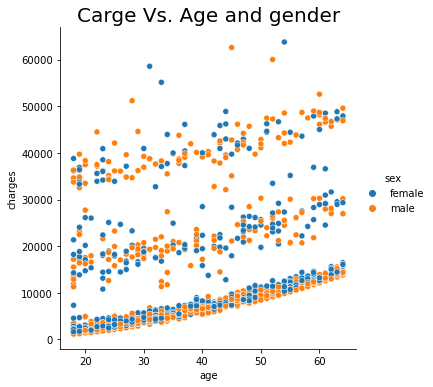

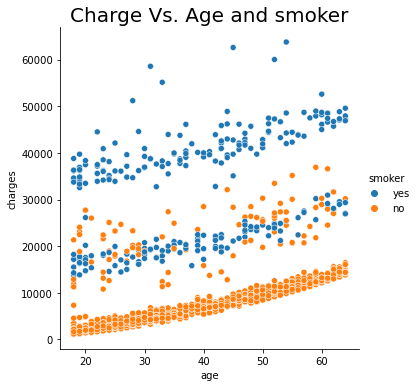

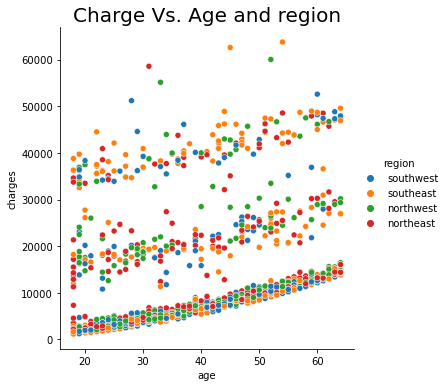

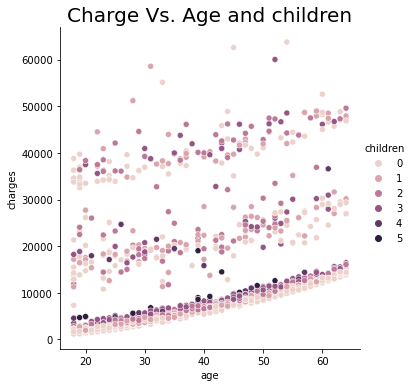

In [6]:
sns.relplot(data=insurance_records, x='age', y=output_variable, hue='sex')
plt.title('Carge Vs. Age and gender', size = 20)
plt.show()
sns.relplot(data=insurance_records, x='age', y=output_variable, hue='smoker')
plt.title('Charge Vs. Age and smoker', size = 20)
plt.show()
sns.relplot(data=insurance_records, x='age', y=output_variable, hue='region')
plt.title('Charge Vs. Age and region', size = 20)
plt.show()
sns.relplot(data=insurance_records, x='age', y=output_variable, hue='children')
plt.title('Charge Vs. Age and children', size=20)
plt.show()

There are three zones in the smoker graph: lower charges for non smokers, higher charges for smokers and a zone in between with smokers and non-smokers. 

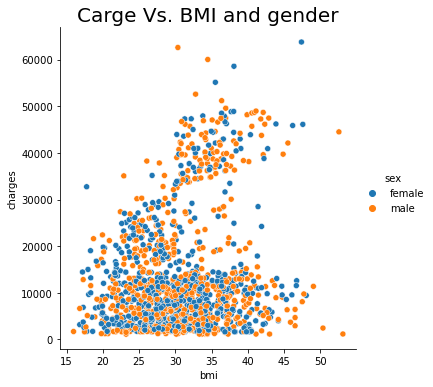

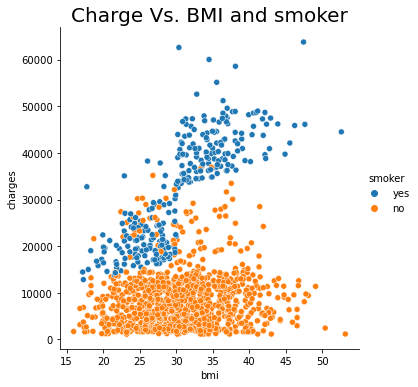

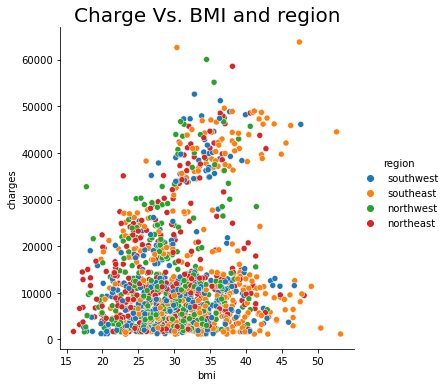

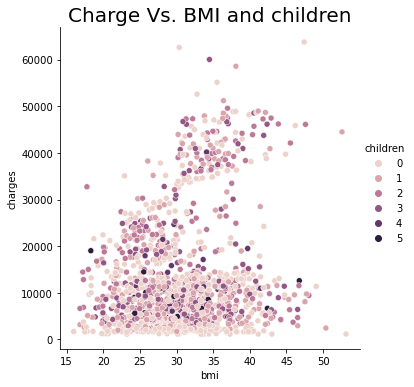

In [7]:
sns.relplot(data=insurance_records, x='bmi', y=output_variable, hue='sex')
plt.title('Carge Vs. BMI and gender', size = 20)
plt.show()
sns.relplot(data=insurance_records, x='bmi', y=output_variable, hue='smoker')
plt.title('Charge Vs. BMI and smoker', size = 20)
plt.show()
sns.relplot(data=insurance_records, x='bmi', y=output_variable, hue='region')
plt.title('Charge Vs. BMI and region', size = 20)
plt.show()
sns.relplot(data=insurance_records, x='bmi', y=output_variable, hue='children')
plt.title('Charge Vs. BMI and children', size=20)
plt.show()

Correlation between cost and BMI is observed but only for smokers.